In [0]:
from pyspark.sql import SparkSession

In [0]:
#Initialize Spark Session
spark = SparkSession.builder.appName("NYC_Taxi_Analysis").getOrCreate()

In [0]:
# read the dataset and create a dataframe
df = spark.read.csv('dbfs:/FileStore/shared_uploads/jameers2003@gmail.com/nyc_tlc_green.csv', header=True, inferSchema=True)
df.show(5)

+--------+-------------------+-------------------+--------------+------------+------------+------------+---------------+--------------+----------------+---------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+--------+-----------+--------+
|vendorID| lpepPickupDatetime|lpepDropoffDatetime|passengerCount|tripDistance|puLocationId|doLocationId|pickupLongitude|pickupLatitude|dropoffLongitude|dropoffLatitude|rateCodeID|storeAndFwdFlag|paymentType|fareAmount|extra|mtaTax|improvementSurcharge|tipAmount|tollsAmount|ehailFee|totalAmount|tripType|
+--------+-------------------+-------------------+--------------+------------+------------+------------+---------------+--------------+----------------+---------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+--------+-----------+--------+
|       2|2018-05-18 20:32:54|2018-05-18 21:08:10|             1|        6.73|       

In [0]:
# Show the schema of the DataFrame
df.printSchema()

root
 |-- vendorID: integer (nullable = true)
 |-- lpepPickupDatetime: timestamp (nullable = true)
 |-- lpepDropoffDatetime: timestamp (nullable = true)
 |-- passengerCount: integer (nullable = true)
 |-- tripDistance: double (nullable = true)
 |-- puLocationId: integer (nullable = true)
 |-- doLocationId: integer (nullable = true)
 |-- pickupLongitude: string (nullable = true)
 |-- pickupLatitude: string (nullable = true)
 |-- dropoffLongitude: string (nullable = true)
 |-- dropoffLatitude: string (nullable = true)
 |-- rateCodeID: integer (nullable = true)
 |-- storeAndFwdFlag: string (nullable = true)
 |-- paymentType: integer (nullable = true)
 |-- fareAmount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mtaTax: double (nullable = true)
 |-- improvementSurcharge: double (nullable = true)
 |-- tipAmount: double (nullable = true)
 |-- tollsAmount: double (nullable = true)
 |-- ehailFee: string (nullable = true)
 |-- totalAmount: double (nullable = true)
 |-- tri

In [0]:
df.dtypes

Out[6]: [('vendorID', 'int'),
 ('lpepPickupDatetime', 'timestamp'),
 ('lpepDropoffDatetime', 'timestamp'),
 ('passengerCount', 'int'),
 ('tripDistance', 'double'),
 ('puLocationId', 'int'),
 ('doLocationId', 'int'),
 ('pickupLongitude', 'string'),
 ('pickupLatitude', 'string'),
 ('dropoffLongitude', 'string'),
 ('dropoffLatitude', 'string'),
 ('rateCodeID', 'int'),
 ('storeAndFwdFlag', 'string'),
 ('paymentType', 'int'),
 ('fareAmount', 'double'),
 ('extra', 'double'),
 ('mtaTax', 'double'),
 ('improvementSurcharge', 'double'),
 ('tipAmount', 'double'),
 ('tollsAmount', 'double'),
 ('ehailFee', 'string'),
 ('totalAmount', 'double'),
 ('tripType', 'int')]

In [0]:
# Display the first few rows
df.show(5)

+--------+-------------------+-------------------+--------------+------------+------------+------------+---------------+--------------+----------------+---------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+--------+-----------+--------+
|vendorID| lpepPickupDatetime|lpepDropoffDatetime|passengerCount|tripDistance|puLocationId|doLocationId|pickupLongitude|pickupLatitude|dropoffLongitude|dropoffLatitude|rateCodeID|storeAndFwdFlag|paymentType|fareAmount|extra|mtaTax|improvementSurcharge|tipAmount|tollsAmount|ehailFee|totalAmount|tripType|
+--------+-------------------+-------------------+--------------+------------+------------+------------+---------------+--------------+----------------+---------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+--------+-----------+--------+
|       2|2018-05-18 20:32:54|2018-05-18 21:08:10|             1|        6.73|       

In [0]:
from pyspark.sql.functions import col, count, when

In [0]:
# Count NULL values in each column
null_counts = df.select(
    [count(when(col(c).isNull(), c)).alias(c) for c in df.columns]
)
null_counts.show()

+--------+------------------+-------------------+--------------+------------+------------+------------+---------------+--------------+----------------+---------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+--------+-----------+--------+
|vendorID|lpepPickupDatetime|lpepDropoffDatetime|passengerCount|tripDistance|puLocationId|doLocationId|pickupLongitude|pickupLatitude|dropoffLongitude|dropoffLatitude|rateCodeID|storeAndFwdFlag|paymentType|fareAmount|extra|mtaTax|improvementSurcharge|tipAmount|tollsAmount|ehailFee|totalAmount|tripType|
+--------+------------------+-------------------+--------------+------------+------------+------------+---------------+--------------+----------------+---------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+--------+-----------+--------+
|       0|                 0|                  0|             0|           0|           

In [0]:
df = df.drop('pickupLongitude', 'pickupLatitude', 'dropoffLongitude', 'dropoffLatitude', 'ehailFee')
df.show()

+--------+-------------------+-------------------+--------------+------------+------------+------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+
|vendorID| lpepPickupDatetime|lpepDropoffDatetime|passengerCount|tripDistance|puLocationId|doLocationId|rateCodeID|storeAndFwdFlag|paymentType|fareAmount|extra|mtaTax|improvementSurcharge|tipAmount|tollsAmount|totalAmount|tripType|
+--------+-------------------+-------------------+--------------+------------+------------+------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+
|       2|2018-05-18 20:32:54|2018-05-18 21:08:10|             1|        6.73|          74|         107|         1|              N|          2|      26.5|  0.0|   0.5|                 0.3|      0.0|        0.0|       27.3|       1|
|       2|2018-05-25 20:16:31|2018-05-25 20:20:07|             1|       

In [0]:
# Count NULL values again in each column
null_counts = df.select(
    [count(when(col(c).isNull(), c)).alias(c) for c in df.columns]
)
null_counts.show()

+--------+------------------+-------------------+--------------+------------+------------+------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+
|vendorID|lpepPickupDatetime|lpepDropoffDatetime|passengerCount|tripDistance|puLocationId|doLocationId|rateCodeID|storeAndFwdFlag|paymentType|fareAmount|extra|mtaTax|improvementSurcharge|tipAmount|tollsAmount|totalAmount|tripType|
+--------+------------------+-------------------+--------------+------------+------------+------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+
|       0|                 0|                  0|             0|           0|           0|           0|         0|              0|          0|         0|    0|     0|                   0|        0|          0|          0|       0|
+--------+------------------+-------------------+--------------+------------

In [0]:
df.dtypes

Out[12]: [('vendorID', 'int'),
 ('lpepPickupDatetime', 'timestamp'),
 ('lpepDropoffDatetime', 'timestamp'),
 ('passengerCount', 'int'),
 ('tripDistance', 'double'),
 ('puLocationId', 'int'),
 ('doLocationId', 'int'),
 ('rateCodeID', 'int'),
 ('storeAndFwdFlag', 'string'),
 ('paymentType', 'int'),
 ('fareAmount', 'double'),
 ('extra', 'double'),
 ('mtaTax', 'double'),
 ('improvementSurcharge', 'double'),
 ('tipAmount', 'double'),
 ('tollsAmount', 'double'),
 ('totalAmount', 'double'),
 ('tripType', 'int')]

In [0]:
# Display summary statistics
df.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+-------------------+---------------+------------------+------------------+-------------------+------------------+--------------------+------------------+-------------------+-----------------+-------------------+
|summary|          vendorID|    passengerCount|      tripDistance|      puLocationId|      doLocationId|         rateCodeID|storeAndFwdFlag|       paymentType|        fareAmount|              extra|            mtaTax|improvementSurcharge|         tipAmount|        tollsAmount|      totalAmount|           tripType|
+-------+------------------+------------------+------------------+------------------+------------------+-------------------+---------------+------------------+------------------+-------------------+------------------+--------------------+------------------+-------------------+-----------------+-------------------+
|  count|            923257|            923257|     

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Convert to pandas DataFrame
pandas_df = df.toPandas()

In [0]:
# Convert 'lpepPickupDatetime' and 'lpepDropoffDatetime' to pandas datetime
pandas_df['lpepPickupDatetime'] = pd.to_datetime(pandas_df['lpepPickupDatetime'])
pandas_df['lpepDropoffDatetime'] = pd.to_datetime(pandas_df['lpepDropoffDatetime'])

In [0]:
# Calculate trip duration in seconds
pandas_df['trip_time_in_secs'] = (pandas_df['lpepDropoffDatetime'] - pandas_df['lpepPickupDatetime']).dt.total_seconds()

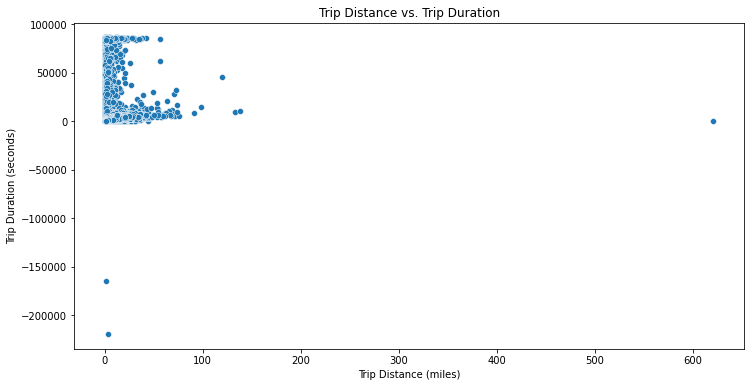

In [0]:
# Scatter plot of trip distance vs. trip duration
plt.figure(figsize=(12, 6))
sns.scatterplot(x='tripDistance', y='trip_time_in_secs', data=pandas_df)
plt.title('Trip Distance vs. Trip Duration')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Trip Duration (seconds)')
plt.show()

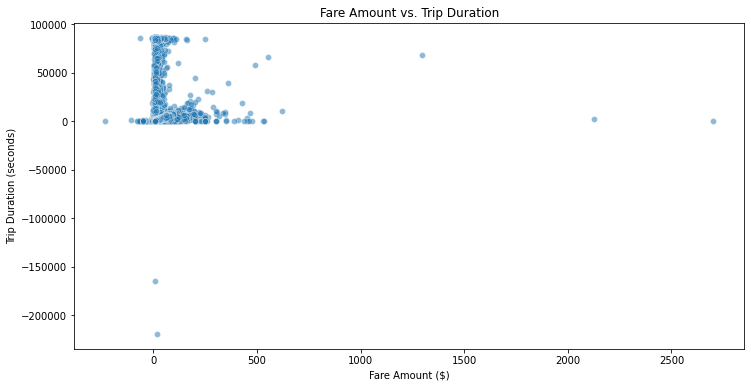

In [0]:
# Scatter plot of fare amount vs. trip duration
plt.figure(figsize=(12, 6))
sns.scatterplot(x='fareAmount', y='trip_time_in_secs', data=pandas_df, alpha=0.5)
plt.title('Fare Amount vs. Trip Duration')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Trip Duration (seconds)')
plt.show()

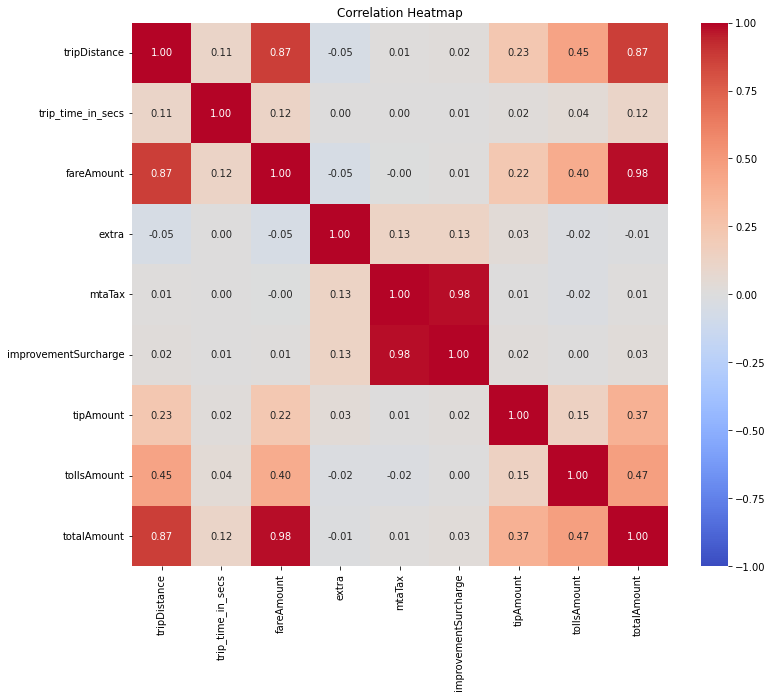

In [0]:
# Compute the correlation matrix
corr = pandas_df[['tripDistance', 'trip_time_in_secs', 'fareAmount', 'extra', 'mtaTax', 'improvementSurcharge', 'tipAmount', 'tollsAmount', 'totalAmount']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [0]:
from pyspark.ml.feature import VectorAssembler

In [0]:
# Convert pandas DataFrame to PySpark DataFrame
pandas_df_spark = spark.createDataFrame(pandas_df)

In [0]:
pandas_df_spark.printSchema()

root
 |-- vendorID: integer (nullable = true)
 |-- lpepPickupDatetime: timestamp (nullable = true)
 |-- lpepDropoffDatetime: timestamp (nullable = true)
 |-- passengerCount: integer (nullable = true)
 |-- tripDistance: double (nullable = true)
 |-- puLocationId: integer (nullable = true)
 |-- doLocationId: integer (nullable = true)
 |-- rateCodeID: integer (nullable = true)
 |-- storeAndFwdFlag: string (nullable = true)
 |-- paymentType: integer (nullable = true)
 |-- fareAmount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mtaTax: double (nullable = true)
 |-- improvementSurcharge: double (nullable = true)
 |-- tipAmount: double (nullable = true)
 |-- tollsAmount: double (nullable = true)
 |-- totalAmount: double (nullable = true)
 |-- tripType: integer (nullable = true)
 |-- trip_time_in_secs: double (nullable = true)



In [0]:
pandas_df_spark.show()

+--------+-------------------+-------------------+--------------+------------+------------+------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+-----------------+
|vendorID| lpepPickupDatetime|lpepDropoffDatetime|passengerCount|tripDistance|puLocationId|doLocationId|rateCodeID|storeAndFwdFlag|paymentType|fareAmount|extra|mtaTax|improvementSurcharge|tipAmount|tollsAmount|totalAmount|tripType|trip_time_in_secs|
+--------+-------------------+-------------------+--------------+------------+------------+------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+-----------------+
|       2|2018-05-18 20:32:54|2018-05-18 21:08:10|             1|        6.73|          74|         107|         1|              N|          2|      26.5|  0.0|   0.5|                 0.3|      0.0|        0.0|       27.3|       1|           2116.0|


In [0]:
# Select the required columns from pandas_df_spark for the join
pandas_df_spark = pandas_df_spark.select('vendorID', 'lpepPickupDatetime', 'lpepDropoffDatetime', 'trip_time_in_secs')

In [0]:
# Perform the join operation
df = df.join(pandas_df_spark, on=['vendorID', 'lpepPickupDatetime', 'lpepDropoffDatetime'], how='inner')

In [0]:
df.show(5)

+--------+-------------------+-------------------+--------------+------------+------------+------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+------------------+
|vendorID| lpepPickupDatetime|lpepDropoffDatetime|passengerCount|tripDistance|puLocationId|doLocationId|rateCodeID|storeAndFwdFlag|paymentType|fareAmount|extra|mtaTax|improvementSurcharge|tipAmount|tollsAmount|totalAmount|tripType| trip_time_in_secs|
+--------+-------------------+-------------------+--------------+------------+------------+------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+------------------+
|       1|2018-05-01 00:00:35|2018-05-01 00:14:30|             1|         6.3|          74|          70|         1|              N|          1|      20.0|  0.5|   0.5|                 0.3|      0.0|       5.76|      27.06|       1|             835

In [0]:
# Select features and label
feature_columns = [
    'tripDistance', 'passengerCount', 'tripType', 'improvementSurcharge', 'tollsAmount', 'tipAmount', 'extra', 'mtaTax'
]
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
df = assembler.transform(df)

In [0]:
df.show()

+--------+-------------------+-------------------+--------------+------------+------------+------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+------------------+--------------------+
|vendorID| lpepPickupDatetime|lpepDropoffDatetime|passengerCount|tripDistance|puLocationId|doLocationId|rateCodeID|storeAndFwdFlag|paymentType|fareAmount|extra|mtaTax|improvementSurcharge|tipAmount|tollsAmount|totalAmount|tripType| trip_time_in_secs|            features|
+--------+-------------------+-------------------+--------------+------------+------------+------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+------------------+--------------------+
|       1|2018-05-01 00:00:35|2018-05-01 00:14:30|             1|         6.3|          74|          70|         1|              N|          1|      20.0|  0.5|   0.5|                 

In [0]:
# Select the label and features
df_lr = df.select("features", col("totalAmount"))
df_lr.show()

+--------------------+-----------+
|            features|totalAmount|
+--------------------+-----------+
|[1.49,6.0,1.0,0.3...|        9.3|
|[1.23,1.0,1.0,0.3...|        7.8|
|[2.1,1.0,1.0,0.3,...|      13.56|
|[3.42,1.0,1.0,0.3...|       15.3|
|[1.2,1.0,1.0,0.3,...|        8.3|
|[4.08,1.0,1.0,0.3...|       21.0|
|[4.74,5.0,1.0,0.3...|      22.88|
|[11.79,1.0,1.0,0....|      47.76|
|[1.0,2.0,1.0,0.3,...|        7.3|
|[6.41,1.0,1.0,0.3...|       21.8|
|[3.16,1.0,1.0,0.3...|       13.8|
|[2.1,1.0,1.0,0.3,...|       12.7|
|[0.9,1.0,1.0,0.3,...|        7.3|
|[1.91,1.0,1.0,0.3...|      11.16|
|[0.82,1.0,1.0,0.3...|        6.3|
|[1.79,2.0,1.0,0.3...|        9.3|
|[0.86,1.0,1.0,0.3...|        5.8|
|[0.6,3.0,1.0,0.3,...|        5.3|
|[6.2,1.0,1.0,0.3,...|      27.35|
|[4.36,2.0,1.0,0.3...|      23.16|
+--------------------+-----------+
only showing top 20 rows



In [0]:
# Split the data into training and test sets
train_df, test_df = df_lr.randomSplit([0.8, 0.2])

In [0]:
train_df.show()

+--------------------+-----------+
|            features|totalAmount|
+--------------------+-----------+
|(8,[0,1,2],[0.01,...|        5.0|
|(8,[0,1,2],[0.01,...|        6.0|
|(8,[0,1,2],[0.01,...|        8.0|
|(8,[0,1,2],[0.01,...|        9.0|
|(8,[0,1,2],[0.01,...|       12.0|
|(8,[0,1,2],[0.01,...|       12.0|
|(8,[0,1,2],[0.01,...|       12.2|
|(8,[0,1,2],[0.01,...|       15.0|
|(8,[0,1,2],[0.01,...|       20.0|
|(8,[0,1,2],[0.01,...|       20.0|
|(8,[0,1,2],[0.01,...|       21.0|
|(8,[0,1,2],[0.01,...|       21.0|
|(8,[0,1,2],[0.01,...|       36.0|
|(8,[0,1,2],[0.01,...|       10.0|
|(8,[0,1,2],[0.02,...|      -25.0|
|(8,[0,1,2],[0.02,...|      -25.0|
|(8,[0,1,2],[0.02,...|       13.0|
|(8,[0,1,2],[0.02,...|       17.0|
|(8,[0,1,2],[0.02,...|       25.0|
|(8,[0,1,2],[0.02,...|       25.0|
+--------------------+-----------+
only showing top 20 rows



In [0]:
test_df.show()

+--------------------+-----------+
|            features|totalAmount|
+--------------------+-----------+
|(8,[0,1,2],[0.01,...|        0.0|
|(8,[0,1,2],[0.01,...|       10.0|
|(8,[0,1,2],[0.01,...|       15.0|
|(8,[0,1,2],[0.01,...|       15.0|
|(8,[0,1,2],[0.02,...|        8.0|
|(8,[0,1,2],[0.03,...|       12.0|
|(8,[0,1,2],[0.04,...|       -9.0|
|(8,[0,1,2],[0.05,...|        6.0|
|(8,[0,1,2],[0.05,...|       -3.0|
|(8,[0,1,2],[0.06,...|        9.0|
|(8,[0,1,2],[0.06,...|       10.0|
|(8,[0,1,2],[0.06,...|       17.0|
|(8,[0,1,2],[0.07,...|       12.0|
|(8,[0,1,2],[0.07,...|       20.0|
|(8,[0,1,2],[0.1,1...|        0.0|
|(8,[0,1,2],[0.1,1...|       30.0|
|(8,[0,1,2],[0.12,...|      -40.0|
|(8,[0,1,2],[0.12,...|        7.0|
|(8,[0,1,2],[0.12,...|       17.0|
|(8,[0,1,2],[0.14,...|       19.0|
+--------------------+-----------+
only showing top 20 rows



In [0]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [0]:
# Initialize Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol='totalAmount')

In [0]:
# Train the model
lr_model = lr.fit(train_df)

In [0]:
# Make predictions
lr_predictions = lr_model.transform(test_df)

In [0]:
lr_predictions.show()

+--------------------+-----------+-------------------+
|            features|totalAmount|         prediction|
+--------------------+-----------+-------------------+
|(8,[0,1,2],[0.01,...|        0.0|-0.6809958742451645|
|(8,[0,1,2],[0.01,...|       10.0|  8.348411020119595|
|(8,[0,1,2],[0.01,...|       15.0|  8.348411020119595|
|(8,[0,1,2],[0.01,...|       15.0|  8.348411020119595|
|(8,[0,1,2],[0.02,...|        8.0|  8.376710141578073|
|(8,[0,1,2],[0.03,...|       12.0|  8.405009263036547|
|(8,[0,1,2],[0.04,...|       -9.0|  8.433308384495021|
|(8,[0,1,2],[0.05,...|        6.0|  8.461607505953495|
|(8,[0,1,2],[0.05,...|       -3.0|  8.555139565681326|
|(8,[0,1,2],[0.06,...|        9.0|  8.489906627411969|
|(8,[0,1,2],[0.06,...|       10.0|  8.489906627411969|
|(8,[0,1,2],[0.06,...|       17.0|  8.489906627411969|
|(8,[0,1,2],[0.07,...|       12.0|  8.518205748870447|
|(8,[0,1,2],[0.07,...|       20.0|  8.518205748870447|
|(8,[0,1,2],[0.1,1...|        0.0|  8.603103113245869|
|(8,[0,1,2

In [0]:
# Evaluate the model rmse value
evaluator_rmse = RegressionEvaluator(labelCol='totalAmount', predictionCol='prediction', metricName='rmse')
lr_rmse = evaluator_rmse.evaluate(lr_predictions)
print(f"Root Mean Squared Error (RMSE) for Linear Regression: {lr_rmse}")

Root Mean Squared Error (RMSE) for Linear Regression: 4.365273628515647


In [0]:
# Evaluate the model r2 score
evaluator_r2 = RegressionEvaluator(labelCol='totalAmount', predictionCol='prediction', metricName='r2')
lr_r2 = evaluator_r2.evaluate(lr_predictions)
print(f"R2 Score for Linear Regression: {lr_r2}")

R2 Score for Linear Regression: 0.8859741109214767


In [0]:
# Print the coefficients and intercept for linear regression
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [2.8299121458474743,0.04676602986391476,9.029406894364762,41.41425473371875,1.1446961805433407,1.1557302188910776,0.840293613384429,-12.913630464346207]
Intercept: -9.785467919932316


In [0]:
# Convert Spark DataFrame to Pandas DataFrame
lr_predictions_pd = lr_predictions.select('totalAmount', 'prediction').toPandas()

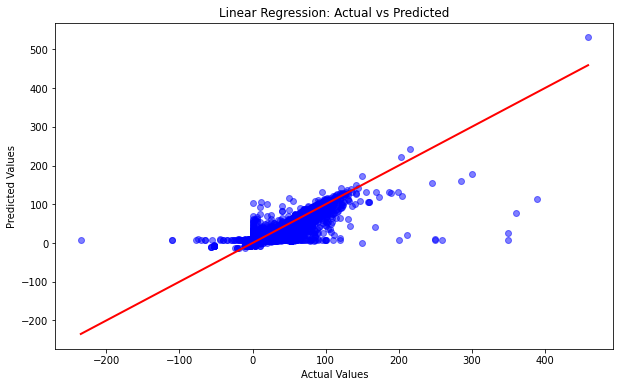

In [0]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(lr_predictions_pd['totalAmount'], lr_predictions_pd['prediction'], color='blue', alpha=0.5)
plt.plot([lr_predictions_pd['totalAmount'].min(), lr_predictions_pd['totalAmount'].max()], 
         [lr_predictions_pd['totalAmount'].min(), lr_predictions_pd['totalAmount'].max()], 
         color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


In [0]:
from pyspark.ml.regression import DecisionTreeRegressor

In [0]:
# Initialize Decision Tree Regressor model
dt = DecisionTreeRegressor(featuresCol='features', labelCol='totalAmount')

In [0]:
# Train the model
dt_model = dt.fit(train_df)

In [0]:
# Make predictions on test data
dt_predictions = dt_model.transform(test_df)

In [0]:
dt_predictions.show()

+--------------------+-----------+-----------------+
|            features|totalAmount|       prediction|
+--------------------+-----------+-----------------+
|(8,[0,1,2],[0.01,...|        0.0|7.643055964716351|
|(8,[0,1,2],[0.01,...|       10.0|7.643055964716351|
|(8,[0,1,2],[0.01,...|       15.0|7.643055964716351|
|(8,[0,1,2],[0.01,...|       15.0|7.643055964716351|
|(8,[0,1,2],[0.02,...|        8.0|7.643055964716351|
|(8,[0,1,2],[0.03,...|       12.0|7.643055964716351|
|(8,[0,1,2],[0.04,...|       -9.0|7.643055964716351|
|(8,[0,1,2],[0.05,...|        6.0|7.643055964716351|
|(8,[0,1,2],[0.05,...|       -3.0|7.643055964716351|
|(8,[0,1,2],[0.06,...|        9.0|7.643055964716351|
|(8,[0,1,2],[0.06,...|       10.0|7.643055964716351|
|(8,[0,1,2],[0.06,...|       17.0|7.643055964716351|
|(8,[0,1,2],[0.07,...|       12.0|7.643055964716351|
|(8,[0,1,2],[0.07,...|       20.0|7.643055964716351|
|(8,[0,1,2],[0.1,1...|        0.0|7.643055964716351|
|(8,[0,1,2],[0.1,1...|       30.0|7.6430559647

In [0]:
# Evaluate the model rmse value
dt_rmse = evaluator_rmse.evaluate(dt_predictions)
print(f"Root Mean Squared Error (RMSE) for Decision Tree Regressor: {dt_rmse}")

Root Mean Squared Error (RMSE) for Decision Tree Regressor: 4.937633741403175


In [0]:
# Evaluate the model r2 value
dt_r2 = evaluator_r2.evaluate(dt_predictions)
print(f"R2 Score for Decision Tree Regressor: {dt_r2}")

R2 Score for Decision Tree Regressor: 0.8541124375655134


In [0]:
# Convert Spark DataFrame to Pandas DataFrame
dt_predictions_pd = dt_predictions.select('totalAmount', 'prediction').toPandas()

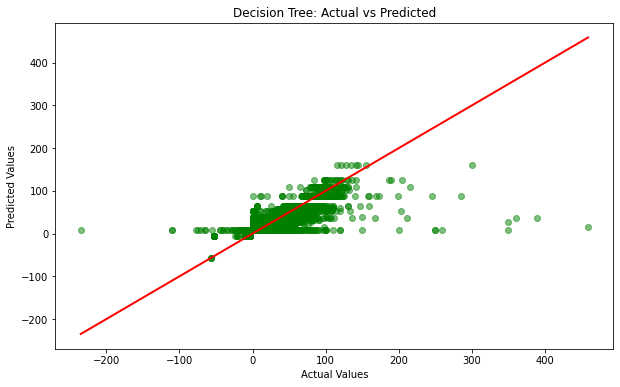

In [0]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(dt_predictions_pd['totalAmount'], dt_predictions_pd['prediction'], color='green', alpha=0.5)
plt.plot([dt_predictions_pd['totalAmount'].min(), dt_predictions_pd['totalAmount'].max()], 
         [dt_predictions_pd['totalAmount'].min(), dt_predictions_pd['totalAmount'].max()], 
         color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree: Actual vs Predicted')
plt.show()

In [0]:
from pyspark.ml.regression import RandomForestRegressor

In [0]:
# Initialize Random Forest Regressor model
rf = RandomForestRegressor(featuresCol='features', labelCol='totalAmount')

In [0]:
# Train the model
rf_model = rf.fit(train_df)

In [0]:
# Make predictions
rf_predictions = rf_model.transform(test_df)

In [0]:
rf_predictions.show()

+--------------------+-----------+------------------+
|            features|totalAmount|        prediction|
+--------------------+-----------+------------------+
|(8,[0,1,2],[0.01,...|        0.0| 9.546142403972112|
|(8,[0,1,2],[0.01,...|       10.0|10.140407020591223|
|(8,[0,1,2],[0.01,...|       15.0|10.140407020591223|
|(8,[0,1,2],[0.01,...|       15.0|10.140407020591223|
|(8,[0,1,2],[0.02,...|        8.0|10.140407020591223|
|(8,[0,1,2],[0.03,...|       12.0|10.140407020591223|
|(8,[0,1,2],[0.04,...|       -9.0|10.140407020591223|
|(8,[0,1,2],[0.05,...|        6.0|10.140407020591223|
|(8,[0,1,2],[0.05,...|       -3.0|10.140407020591223|
|(8,[0,1,2],[0.06,...|        9.0|10.140407020591223|
|(8,[0,1,2],[0.06,...|       10.0|10.140407020591223|
|(8,[0,1,2],[0.06,...|       17.0|10.140407020591223|
|(8,[0,1,2],[0.07,...|       12.0|10.140407020591223|
|(8,[0,1,2],[0.07,...|       20.0|10.140407020591223|
|(8,[0,1,2],[0.1,1...|        0.0|10.140407020591223|
|(8,[0,1,2],[0.1,1...|      

In [0]:
# Evaluate the model rmse value
rf_rmse = evaluator_rmse.evaluate(rf_predictions)
print(f"Root Mean Squared Error (RMSE) for Random Forest Regressor: {rf_rmse}")

Root Mean Squared Error (RMSE) for Random Forest Regressor: 5.314851837200134


In [0]:
# Evaluate the model r2 score
rf_r2 = evaluator_r2.evaluate(rf_predictions)
print(f"R2 Score for Random Forest Regressor: {rf_r2}")

R2 Score for Random Forest Regressor: 0.8309703672347427


In [0]:
# Convert Spark DataFrame to Pandas DataFrame
rf_predictions_pd = rf_predictions.select('totalAmount', 'prediction').toPandas()

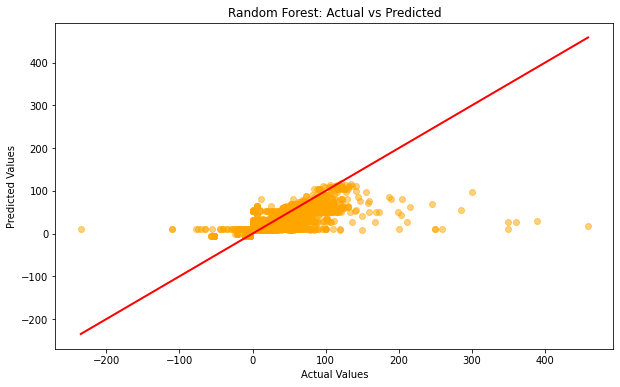

In [0]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rf_predictions_pd['totalAmount'], rf_predictions_pd['prediction'], color='orange', alpha=0.5)
plt.plot([rf_predictions_pd['totalAmount'].min(), rf_predictions_pd['totalAmount'].max()], 
         [rf_predictions_pd['totalAmount'].min(), rf_predictions_pd['totalAmount'].max()], 
         color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

In [0]:
# Compare the performance of the models
models = {
    "Model": ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor'],
    "RMSE": [lr_rmse, dt_rmse, rf_rmse],
    "R2": [lr_r2, dt_r2, rf_r2]
}
model_scores = pd.DataFrame(models)
model_scores

,Model,RMSE,R2
0,LinearRegression,4.365274,0.885974
1,DecisionTreeRegressor,4.937634,0.854112
2,RandomForestRegressor,5.314852,0.830970


In [0]:
# Choose the best model based on RMSE
best_model = 'Linear Regression' if lr_rmse < dt_rmse and lr_rmse < rf_rmse else 'Decision Tree' if dt_rmse < lr_rmse and dt_rmse < rf_rmse else 'Random Forest'
print(f"The best model is: {best_model}")

The best model is: Linear Regression
